##### Copyright 2024 Google LLC.

In [17]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Read a PDF

This notebook demonstrates how you can convert a PDF file so that it can be read by the Gemini API.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/PDF_Files.ipynb"><img src="../images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## Setup

In [18]:
!pip install -Uq "google-generativeai>=0.7.2"

In [19]:
import google.generativeai as genai


import pathlib
import tqdm
import os

## Configure your API key

To run the following cell, your API key must be stored in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Authentication.ipynb) for an example.

In [20]:
from google.colab import userdata
genai.configure(api_key=userdata.get("GOOGLE_API_KEY"))

## Download and inspect the PDF

Install the PDF processing tools. You don't need these to use the API, it's just used to display a screenshot of a page.

In [21]:
!apt install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


This PDF page is an article titled [Smoothly editing material properties of objects with text-to-image models and synthetic data](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) available on the Google Research Blog.

In [22]:
if not pathlib.Path('test.pdf').exists():
  !curl -o test.pdf https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf

Look at one of the pages:

In [23]:
!pdftoppm test.pdf -f 1 -l 1 page-image -jpeg
!ls

page-image-1.jpg  sample_data  test.pdf


In [24]:
import PIL.Image

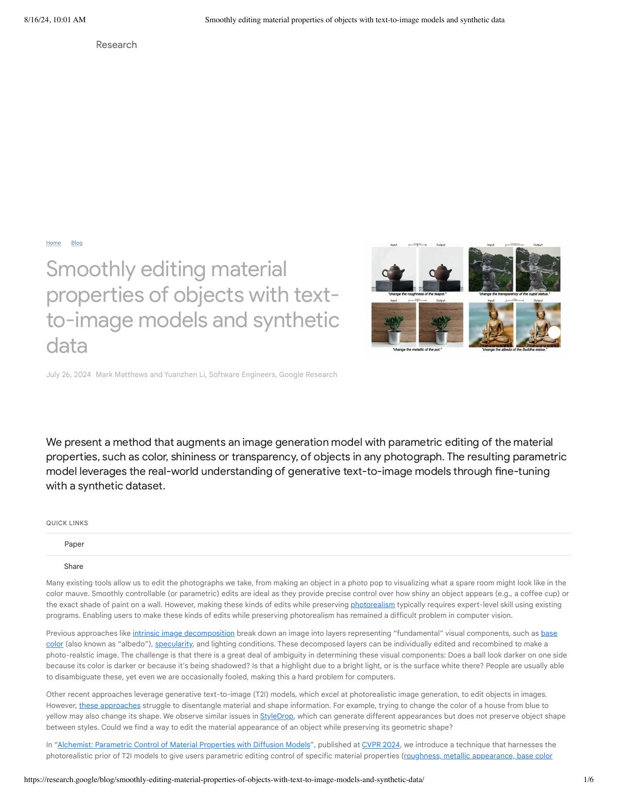

In [25]:
img = PIL.Image.open(f"page-image-1.jpg")
img.thumbnail([800, 800])
img

## Upload the file to the API

In [26]:
file_ref = genai.upload_file('test.pdf')

## Try it out

In [27]:
model = genai.GenerativeModel(model_name='gemini-1.5-flash')

The pages of the PDF file are each passed to the model as a screenshot of the page plus the text extracted by OCR.

In [28]:
model.count_tokens([file_ref, '\n\nCan you summarize this file as a bulleted list?'])

total_tokens: 4431

In [29]:
response = model.generate_content(
    [file_ref, '\n\nCan you summarize this file as a bulleted list?']
)

In [30]:
from IPython.display import Markdown
Markdown(response.text)

This file contains a Google Research blog post about a new method that allows users to edit the material properties of objects in images using text-to-image models. 

- The method leverages a synthetic dataset to train a model to edit the material properties of objects in images, preserving the object's shape and image lighting. 

- This method can be used to make objects more metallic or transparent, change the roughness of an object, or even change the color of an object. 

- The model's potential use cases include interior design, product design, and even 3D reconstruction. 

- The researchers found that their method outperformed a baseline method in a user study.

- This research is exciting because it demonstrates the potential of text-to-image models to be used for creative and practical applications. 


In addition, take a look at how the Gemini model responds when you ask questions about the images within the PDF.

In [31]:
response_2 = model.generate_content(
    [file_ref, '\n\nCan you explain the images on the first page of the document?']
)

In [32]:
from IPython.display import Markdown
Markdown(response_2.text)

The first page of the document shows a variety of examples of how a text-to-image model can be used to edit the material properties of objects in images. For example, in the first image, a user has asked the model to change the roughness of a teapot. The model has successfully changed the roughness of the teapot while preserving its overall shape and lighting. The other images show examples of how the model can be used to change the transparency, metallic appearance, and albedo of objects. 


If you observe the area of the header of the article, you can see that the model captures what is happening.

## Learning more

The File API lets you upload a variety of multimodal MIME types, including images, audio, and video formats. The File API handles inputs that can be used to generate content with `model.generateContent` or `model.streamGenerateContent`.

The File API accepts files under 2GB in size and can store up to 20GB of files per project. Files last for 2 days and cannot be downloaded from the API.

* Learn more about the [File API](https://github.com/google-gemini/cookbook/blob/main/quickstarts/File_API.ipynb) with the quickstart.

* Learn more about prompting with [media files](https://ai.google.dev/gemini-api/docs/file-prompting-strategies) in the docs, including the supported formats and maximum length.
